<a href="https://colab.research.google.com/github/Zahid-Hasan-007/Stock-Market-Prediction-using-Machine-Learning/blob/main/StockMarket_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Libraries for the project.


In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.express as px


In [ ]:
df = pd.read_csv('/content/Twitter Stock Market Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/7/2013,45.099998,50.090000,44.000000,44.900002,44.900002,117701670
1,11/8/2013,45.930000,46.939999,40.685001,41.650002,41.650002,27925307
2,11/11/2013,40.500000,43.000000,39.400002,42.900002,42.900002,16113941
3,11/12/2013,43.660000,43.779999,41.830002,41.900002,41.900002,6316755
4,11/13/2013,41.029999,42.869999,40.759998,42.599998,42.599998,8688325


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2013-11-07 00:00:00 2022-10-27 00:00:00
Total days = 3276 days


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
std,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


<Axes: >

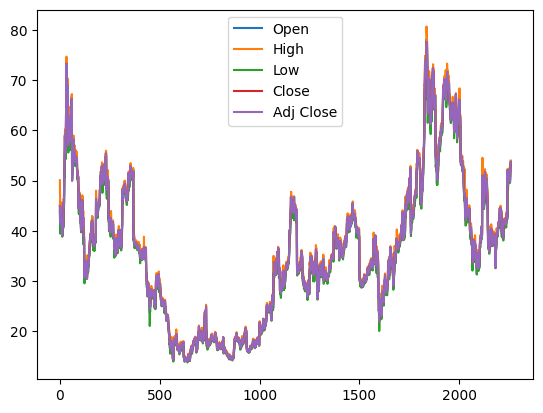

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='line')

<Axes: >

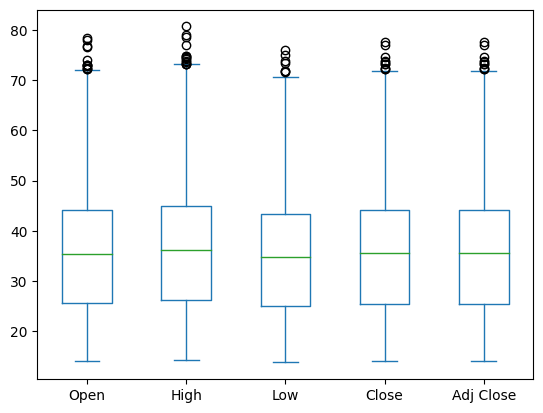

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close', 'Adj Close'],
              labels={'value': 'Price', 'variable': 'Stock Price'},
              title='Stock Prices of Twitter')

fig.update_layout(
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#FF0000'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#FF0000'
        )
    )
)

fig.show()

In [ ]:

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:

X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Create a DataFrame for visualization
dataf = pd.DataFrame({'Actual': Y_train, 'Predicted': lm.predict(X_train).T, 'Day': X_train.T[0]})

# Use Plotly Express to create a line plot
fig = px.scatter(dataf, x='Day', y=['Actual', 'Predicted'], title='Actual vs Predicted Values')
fig.show()

In [ ]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.10920055619230717	0.04971006272112399
MSE       177.6059755472771	186.4031977884335



LSTM Algorithm

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325


In [ ]:
df1=df.drop(['Adj Close'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2259 non-null   datetime64[ns]
 1   Open    2259 non-null   float64       
 2   High    2259 non-null   float64       
 3   Low     2259 non-null   float64       
 4   Close   2259 non-null   float64       
 5   Volume  2259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.0 KB


In [ ]:
trainData = df1.iloc[:,4:5].values


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2259, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,2259): #60 : timestep // 2259 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(2199, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
69/69 - 23s - loss: 0.0117 - 23s/epoch - 327ms/step
Epoch 2/20
69/69 - 13s - loss: 0.0047 - 13s/epoch - 193ms/step
Epoch 3/20
69/69 - 13s - loss: 0.0046 - 13s/epoch - 192ms/step
Epoch 4/20
69/69 - 13s - loss: 0.0032 - 13s/epoch - 192ms/step
Epoch 5/20
69/69 - 13s - loss: 0.0037 - 13s/epoch - 193ms/step
Epoch 6/20
69/69 - 13s - loss: 0.0027 - 13s/epoch - 193ms/step
Epoch 7/20
69/69 - 13s - loss: 0.0024 - 13s/epoch - 188ms/step
Epoch 8/20
69/69 - 13s - loss: 0.0024 - 13s/epoch - 183ms/step
Epoch 9/20
69/69 - 13s - loss: 0.0025 - 13s/epoch - 182ms/step
Epoch 10/20
69/69 - 13s - loss: 0.0021 - 13s/epoch - 192ms/step
Epoch 11/20
69/69 - 13s - loss: 0.0020 - 13s/epoch - 193ms/step
Epoch 12/20
69/69 - 13s - loss: 0.0020 - 13s/epoch - 194ms/step
Epoch 13/20
69/69 - 13s - loss: 0.0020 - 13s/epoch - 193ms/step
Epoch 14/20
69/69 - 13s - loss: 0.0017 - 13s/epoch - 193ms/step
Epoch 15/20
69/69 - 13s - loss: 0.0017 - 13s/epoch - 192ms/step
Epoch 16/20
69/69 - 13s - loss: 0.0017 - 13s/epoc

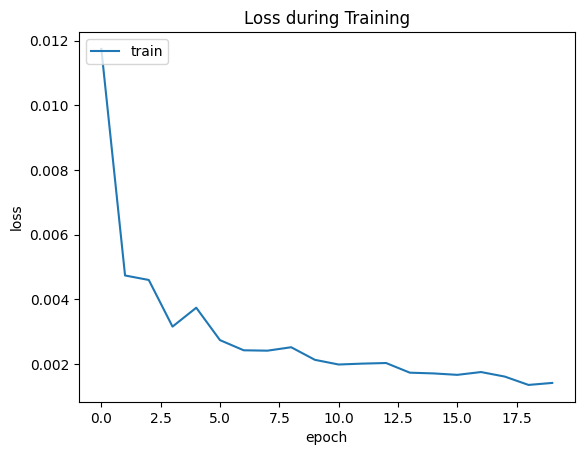

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Loss during Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/Twitter Stock Market Dataset.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(2199, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

69/69 [==============================] - 7s 74ms/step


array([[0.8242516 ],
       [0.8278717 ],
       [0.7401206 ],
       ...,
       [0.5939217 ],
       [0.59781474],
       [0.61028713]], dtype=float32)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

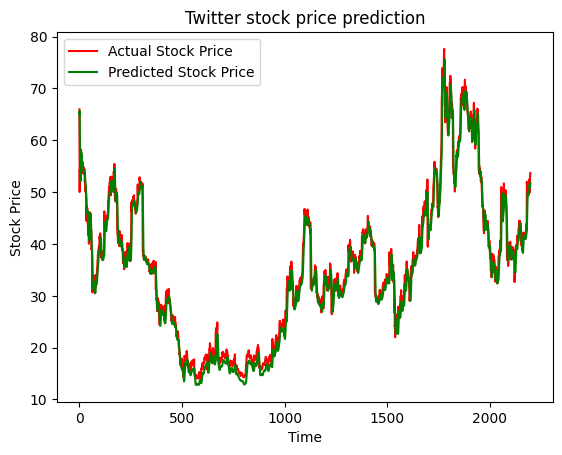

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Twitter stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()